In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import scipy as sp
import cv2 as cv

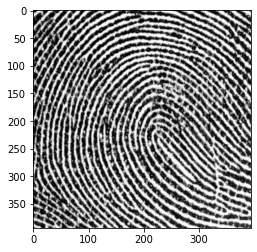

In [2]:
#setup
#Reading in gray scale
img = cv.imread('fp.jpg',0)
plt.imshow(img, cmap = 'gray')

(a)

In [3]:

f = np.fft.fft2(img) 
fr = f.real
fj = f.imag

images = np.array([fr,fj,np.abs(f)])
title = ['real', 'imaginária', 'módulo']

(b)

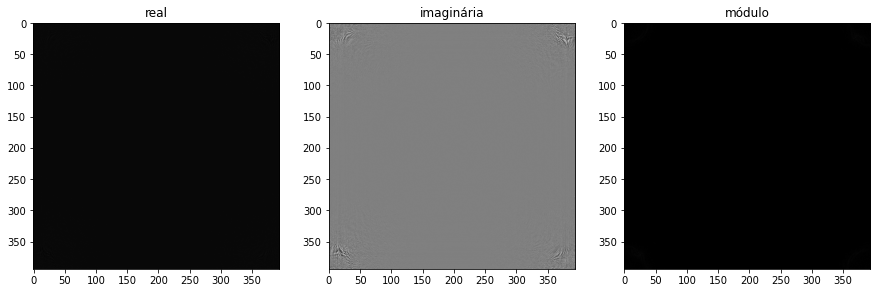

In [4]:
#plot sem fftshift
_, ax = plt.subplots(1, len(images), figsize=(5 * len(images), 5))
for i in range(len(images)):
    ax[i].imshow(images[i], cmap='gray')
    ax[i].set_title(title[i])
plt.show()

In [5]:
fshift = np.fft.fftshift(f)
fshiftr = fshift.real
fshiftj = fshift.imag

imagesS = np.array([fshiftr,fshiftj,np.abs(fshift)])
titleS = ['real', 'imaginária', 'módulo']

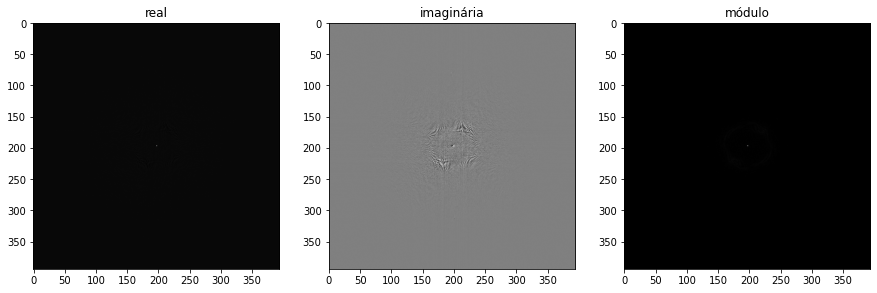

In [6]:
#plot com fftshift
_, ax = plt.subplots(1, len(imagesS), figsize=(5 * len(images), 5))
for i in range(len(imagesS)):
    ax[i].imshow(imagesS[i], cmap='gray')
    ax[i].set_title(title[i])
plt.show()

(c)

In [7]:
magnitude_spectrum = np.log1p(np.abs(f))
magnitude_spectrumS = np.log1p(np.abs(fshift))

result = np.array([magnitude_spectrum, magnitude_spectrumS])
titleR = ['sem shift', 'com shift']

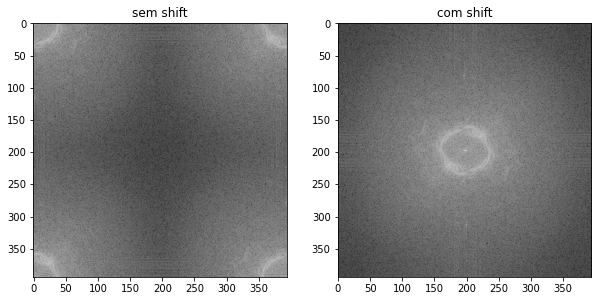

In [8]:
#plot com fftshift
_, ax = plt.subplots(1, len(result), figsize=(5 * len(result), 5))
for i in range(len(result)):
    ax[i].imshow(result[i], cmap='gray')
    ax[i].set_title(titleR[i])
plt.show()

In [9]:
#setup
rows, cols = img.shape
crow,ccol = int(rows/2) , int(cols/2)

(d) LOW PASS

In [10]:

#create a mask lpf
lpfMask = np.zeros((rows,cols),np.uint8)
lpfMask[crow-47:crow+47, ccol-47:ccol+47] = 1

lpfOutput = fshift * lpfMask
lpf_F_ishift = np.fft.ifftshift(lpfOutput)
lpf_img_back = np.fft.ifft2(lpf_F_ishift)
lpf_img_back = np.real(lpf_img_back)

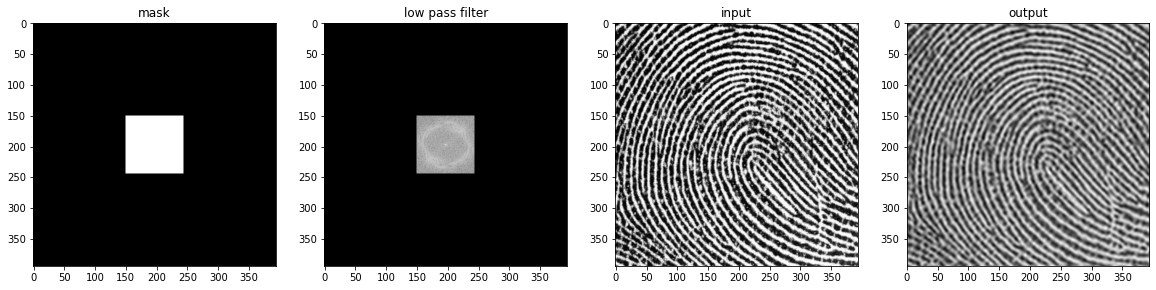

In [11]:
lpfResult = np.array([lpfMask, (magnitude_spectrumS * lpfMask), img, lpf_img_back])
lpfTitle = ['mask','low pass filter', 'input', 'output']

_, ax = plt.subplots(1, len(lpfResult), figsize=(5 * len(lpfResult), 5))
for i in range(len(lpfResult)):
    ax[i].imshow(lpfResult[i], cmap='gray')
    ax[i].set_title(lpfTitle[i])
plt.show()

(e) HIGH PASS

In [12]:
#create a mask Hpf
hpfMask = np.ones((rows,cols),np.uint8)
hpfMask[crow-47:crow+47, ccol-47:ccol+47] = 0

lpfOutput = fshift * hpfMask
hpf_F_ishift = np.fft.ifftshift(lpfOutput)
hpf_img_back = np.fft.ifft2(hpf_F_ishift)
hpf_img_back = np.real(hpf_img_back)

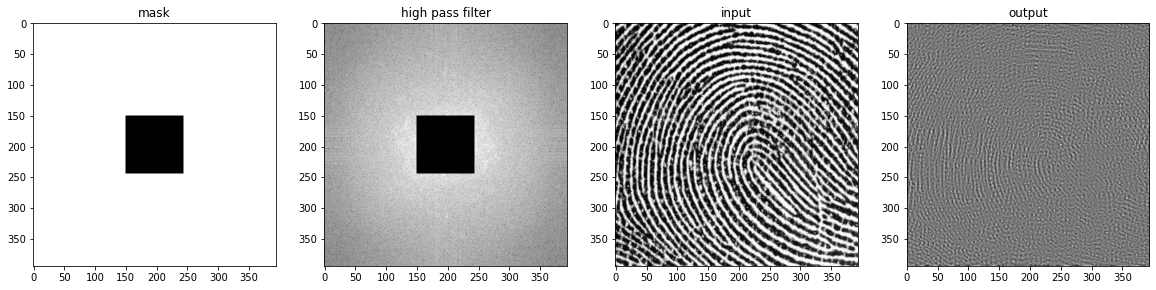

In [13]:
hpfResult = np.array([hpfMask, (magnitude_spectrumS * hpfMask), img, hpf_img_back])
hpfTitle = ['mask','high pass filter', 'input', 'output']

_, ax = plt.subplots(1, len(hpfResult), figsize=(5 * len(hpfResult), 5))
for i in range(len(hpfResult)):
    ax[i].imshow(hpfResult[i], cmap='gray')
    ax[i].set_title(hpfTitle[i])
plt.show()